In [1]:
# Parameters
annotations_to_plot = []
FILE1 = "PBMCmix_1.SC__SCANPY__COMPUTE_QC_STATS.h5ad"
FILE2 = "PBMCmix_1.SC__SCANPY__GENE_FILTER.h5ad"
WORKFLOW_MANIFEST = "{\"doi\":null,\"nextflowVersion\":\"!>=20.10.0\",\"defaultBranch\":\"master\",\"version\":\"0.25.0\",\"homePage\":\"https://github.com/vib-singlecell-nf/vsn-pipelines\",\"gitmodules\":null,\"description\":\"A repository of pipelines for single-cell data in Nextflow DSL2\",\"recurseSubmodules\":false,\"name\":\"vib-singlecell-nf/vsn-pipelines\",\"mainScript\":\"main.nf\",\"author\":null}"
WORKFLOW_PARAMETERS = "{\"global\":{\"project_name\":\"CNAG_10x_RNA\",\"outdir\":\"out\",\"species\":\"human\",\"seed\":250,\"genome\":{\"assembly\":\"hg38\"}},\"misc\":{\"test\":{\"enabled\":false},\"manifestAsJSON\":\"{\\\"doi\\\":null,\\\"nextflowVersion\\\":\\\"!>=20.10.0\\\",\\\"defaultBranch\\\":\\\"master\\\",\\\"version\\\":\\\"0.25.0\\\",\\\"homePage\\\":\\\"https://github.com/vib-singlecell-nf/vsn-pipelines\\\",\\\"gitmodules\\\":null,\\\"description\\\":\\\"A repository of pipelines for single-cell data in Nextflow DSL2\\\",\\\"recurseSubmodules\\\":false,\\\"name\\\":\\\"vib-singlecell-nf/vsn-pipelines\\\",\\\"mainScript\\\":\\\"main.nf\\\",\\\"author\\\":null}\"},\"utils\":{\"container\":\"vibsinglecellnf/utils:0.4.0\",\"publish\":{\"compressionLevel\":6,\"annotateWithBatchVariableName\":false,\"mode\":\"copy\"}},\"sc\":{\"file_converter\":{\"off\":\"h5ad\",\"tagCellWithSampleId\":true,\"remove10xGEMWell\":false,\"useFilteredMatrix\":true,\"makeVarIndexUnique\":false},\"file_concatenator\":{\"join\":\"outer\",\"off\":\"h5ad\"},\"scanpy\":{\"container\":\"vibsinglecellnf/scanpy:0.5.2\",\"report\":{\"annotations_to_plot\":[]},\"feature_selection\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_select_variable_genes_report.ipynb\",\"method\":\"mean_disp_plot\",\"minMean\":0.0125,\"maxMean\":3,\"minDisp\":0.5,\"off\":\"h5ad\"},\"feature_scaling\":{\"method\":\"zscore_scale\",\"maxSD\":10,\"off\":\"h5ad\"},\"neighborhood_graph\":{\"off\":\"h5ad\"},\"dim_reduction\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_dim_reduction_report.ipynb\",\"pca\":{\"method\":\"pca\",\"off\":\"h5ad\"},\"umap\":{\"method\":\"umap\",\"off\":\"h5ad\"},\"tsne\":{\"method\":\"tsne\",\"off\":\"h5ad\"}},\"clustering\":{\"preflight_checks\":true,\"report_ipynb\":\"/src/scanpy/bin/reports/sc_clustering_report.ipynb\",\"method\":\"leiden\",\"resolutions\":[0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0],\"off\":\"h5ad\"},\"marker_genes\":{\"method\":\"wilcoxon\",\"ngenes\":0,\"groupby\":\"louvain\",\"off\":\"h5ad\"},\"filter\":{\"report_ipynb\":\"/src/scanpy/bin/reports/sc_filter_qc_report.ipynb\",\"cellFilterStrategy\":\"fixedthresholds\",\"cellFilterMinNCounts\":2000,\"cellFilterMinNGenes\":200,\"cellFilterMaxNGenes\":{\"PBMCmix_1\":5500,\"PBMCmix_2\":5000,\"PBMCmix_3\":3500},\"cellFilterMaxPercentMito\":{\"PBMCmix_1\":0.20,\"PBMCmix_2\":0.18,\"PBMCmix_3\":0.20},\"geneFilterMinNCells\":3,\"off\":\"h5ad\",\"outdir\":\"out\"},\"data_transformation\":{\"method\":\"log1p\",\"off\":\"h5ad\"},\"normalization\":{\"method\":\"cpx\",\"countsPerCellAfter\":10000,\"off\":\"h5ad\"}},\"harmony\":{\"container\":\"vibsinglecellnf/harmony:1.0-1\",\"report_ipynb\":\"/src/harmony/bin/reports/sc_harmony_report.ipynb\",\"varsUse\":[\"batch\"]},\"scope\":{\"genome\":\"\",\"tree\":{\"level_1\":\"scATAC-seq_Benchmark\",\"level_2\":\"RNA\",\"level_3\":\"\"}},\"cell_annotate\":{\"off\":\"h5ad\",\"method\":\"aio\",\"cellMetaDataFilePath\":\"/staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/scRNA/cell_type_classification/seruat/CNAG_RNA_cell_type_seurat.txt\",\"sampleSuffixWithExtension\":\"\",\"indexColumnName\":\"composite_sample_id\",\"sampleColumnName\":\"sample_id\",\"annotationColumnNames\":[\"cell_type\",\"cell_type_pred_score\",\"cell_type_hiconf_70\"]}},\"data\":{\"tenx\":{\"cellranger_mex\":\"/staging/leuven/stg_00002/lcb/lcb_projects/BAP/data_unsorted/scRNA/SCGRES_13/cellranger/*/outs\"}},\"pcacv\":{\"container\":\"vibsinglecellnf/pcacv:0.2.0\",\"find_optimal_npcs\":{\"accessor\":\"@assays$RNA@scale.data\"}}}"


# Single-Cell Report: Filtering and QC

In [2]:
import os
print("Files in use:")
print(f"FILE1='{os.path.abspath(FILE1)}'")
print(f"FILE2='{os.path.abspath(FILE2)}'")

Files in use:
FILE1='/lustre1/project/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/scRNA/SCGRES_13__VSN_harmony/work/3a/0fff40c4dc56c78c630399d89d41a4/PBMCmix_1.SC__SCANPY__COMPUTE_QC_STATS.h5ad'
FILE2='/lustre1/project/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/scRNA/SCGRES_13__VSN_harmony/work/3a/0fff40c4dc56c78c630399d89d41a4/PBMCmix_1.SC__SCANPY__GENE_FILTER.h5ad'


In [3]:
# Import packages
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from collections import Counter

#### Plotting settings and functions

In [4]:
# plot settings
sc.set_figure_params(dpi=150, fontsize=10, dpi_save=600)
hist_dims = (10,3)

In [5]:
def plotSummaryHist(adata, nCellsPerGene, figsize=(10,3), draw_thresholds=False, log_x=[False]*4, log_y=[False]*4):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=figsize, dpi=150, sharey=False)

    sns.distplot( adata.obs['n_genes'], ax=ax1, norm_hist=True, bins='fd')
    ax1.title.set_text('Genes expressed per cell')

    sns.distplot( adata.obs['n_counts'], ax=ax2, norm_hist=True, bins='fd')
    ax2.title.set_text('Counts per cell')

    if 'percent_mito' in adata.obs.keys():
        sns.distplot( adata.obs['percent_mito'], ax=ax3, norm_hist=True, bins='fd')
        ax3.title.set_text('Mitochondrial read fraction per cell')
        if(draw_thresholds and not adata.uns['sc']['scanpy']['filter']['cellFilterMaxPercentMito'] == -1):
            ax3.axvline(x=adata.uns['sc']['scanpy']['filter']['cellFilterMaxPercentMito'], ymin=0,ymax=1, color='red')
    else:
        warnings.warn("Percentage of mitochondrial genes expressed in cells not calculated")
        
    nc_cnt = Counter(nCellsPerGene)
    nc_cnt_df = pd.DataFrame( [list(nc_cnt.keys()), list(nc_cnt.values())] ).T.sort_values(by=0)
    ax4.bar(nc_cnt_df[0], nc_cnt_df[1] )
    ax4.margins(x=0.01)
    ax4.title.set_text('Cells expressing each gene')
    
    # set axes to log-scale:
    for i,ax in enumerate((ax1,ax2,ax3,ax4)):
        ax.tick_params(axis='y', which='major', labelsize=8)
        if log_x[i]:
            ax.set_xscale('log')
        if log_y[i]:
            ax.set_yscale('log')

    if(draw_thresholds):
        if not adata.uns['sc']['scanpy']['filter']['cellFilterMinNGenes'] == -1:
            ax1.axvline(x=adata.uns['sc']['scanpy']['filter']['cellFilterMinNGenes'], ymin=0,ymax=1, color='red')
        if not adata.uns['sc']['scanpy']['filter']['cellFilterMaxNGenes'] == -1:
            ax1.axvline(x=adata.uns['sc']['scanpy']['filter']['cellFilterMaxNGenes'], ymin=0,ymax=1, color='red')
        if not adata.uns['sc']['scanpy']['filter']['cellFilterMinNCounts'] == -1:
            ax2.axvline(x=adata.uns['sc']['scanpy']['filter']['cellFilterMinNCounts'], ymin=0,ymax=1, color='red')
        if not adata.uns['sc']['scanpy']['filter']['cellFilterMaxNCounts'] == -1:
            ax2.axvline(x=adata.uns['sc']['scanpy']['filter']['cellFilterMaxNCounts'], ymin=0,ymax=1, color='red')
        if not adata.uns['sc']['scanpy']['filter']['geneFilterMinNCells'] == -1:
            ax4.axvline(x=adata.uns['sc']['scanpy']['filter']['geneFilterMinNCells']-0.5, ymin=0,ymax=1, color='red')

    
    fig.text(0.00, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
    fig.tight_layout()

In [6]:
def plotSingleDiagnosticHist(x, nbins='fd', filter_thr=None, xlab="", log_x=False, log_y=False, kde=True):
    
    fig, ax = plt.subplots(1, 1, figsize=hist_dims, dpi=150)
    
    sns.distplot(x, ax=ax, norm_hist=True, kde=kde, bins=nbins)
    ax.set_xlabel("")    
            
    ax.margins(x=0.01)
    if type(filter_thr)==list:
        if filter_thr[1] > ax.get_xlim()[1]:
            ax.set_xlim(right=filter_thr[1])
        if filter_thr[0] < ax.get_xlim()[0]:
            ax.set_xlim(left=filter_thr[0])        
        for i,x in enumerate(filter_thr):
            if not x == -1:
                ax.axvline(x=x, ymin=0,ymax=1, color='red')
    elif filter_thr != -1:
        ax.axvline(x=filter_thr, ymin=0,ymax=1, color='red')
    
    if log_x:
        ax.set_xscale('log')
    if log_y:
        ax.set_yscale('log')
    
    fig.text(0.00, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
    fig.text(0.5, 0.0, xlab, ha='center', va='center', size='x-large')
    
    fig.tight_layout()

In [7]:
def plotSingleDiagnosticBar(x, filter_thr=None, xlab="", log_x=False, log_y=False):

    fig, ax = plt.subplots(1, 1, figsize=hist_dims, dpi=150)

    nc_cnt = Counter(x+0.1)
    nc_cnt_df = pd.DataFrame( [list(nc_cnt.keys()), list(nc_cnt.values())] ).T.sort_values(by=0)
    ax.bar(nc_cnt_df[0], nc_cnt_df[1])
    ax.set_xlabel("")

    #nc_cnt_df_sub = nc_cnt_df[ nc_cnt_df[0]<20 ]
    #for i,r in nc_cnt_df_sub.iterrows():
    #    plt.text(r[0], r[1], r[0], fontsize='small', ha='center') # display the x value on each bar

    ax.margins(x=0.01)
    if filter_thr != -1:
        ax.axvline(x=filter_thr, ymin=0,ymax=1, color='red')
    
    if log_x:
        ax.set_xscale('log')
    if log_y:
        ax.set_yscale('log')

    fig.text(0.00, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
    fig.text(0.5, 0.0, xlab, ha='center', va='center', size='x-large')
    
    fig.tight_layout()

## Read Data

We read in the data pre-filtered, and post-filtered, with the filtering parameters specified in the nextflow config file applied.

In [8]:
adata_pre = sc.read_h5ad(filename=FILE1)
adata_post = sc.read_h5ad(filename=FILE2)

In [9]:
sum(np.isnan(adata_pre.obs["percent_mito"]))

0

In [10]:
adata_pre.obs = adata_pre.obs.fillna(
    value={
        "percent_mito":0
    }
)

---
# Prefilter diagnostics

#### Basic Gene-Level Summary Statistics

In [11]:
n_counts_per_gene = np.sum(adata_pre.X, axis=0)
n_cells_per_gene = np.sum(adata_pre.X>0, axis=0)
print("Number of counts (in the dataset units) per gene:", n_counts_per_gene.min(), " - " ,n_counts_per_gene.max())
print("Number of cells in which each gene is detected:", n_cells_per_gene.min(), " - " ,n_cells_per_gene.max())
nCellsPerGene_pre = pd.Series( n_cells_per_gene.tolist()[0], index=adata_pre.var_names )

Number of counts (in the dataset units) per gene: 0.0  -  765140.0
Number of cells in which each gene is detected: 0  -  1873


## Diagnostic Plots (pre-filtering)

#### Highly expressed genes

Show the genes with the highest fraction of counts assigned to that gene over all the cells.

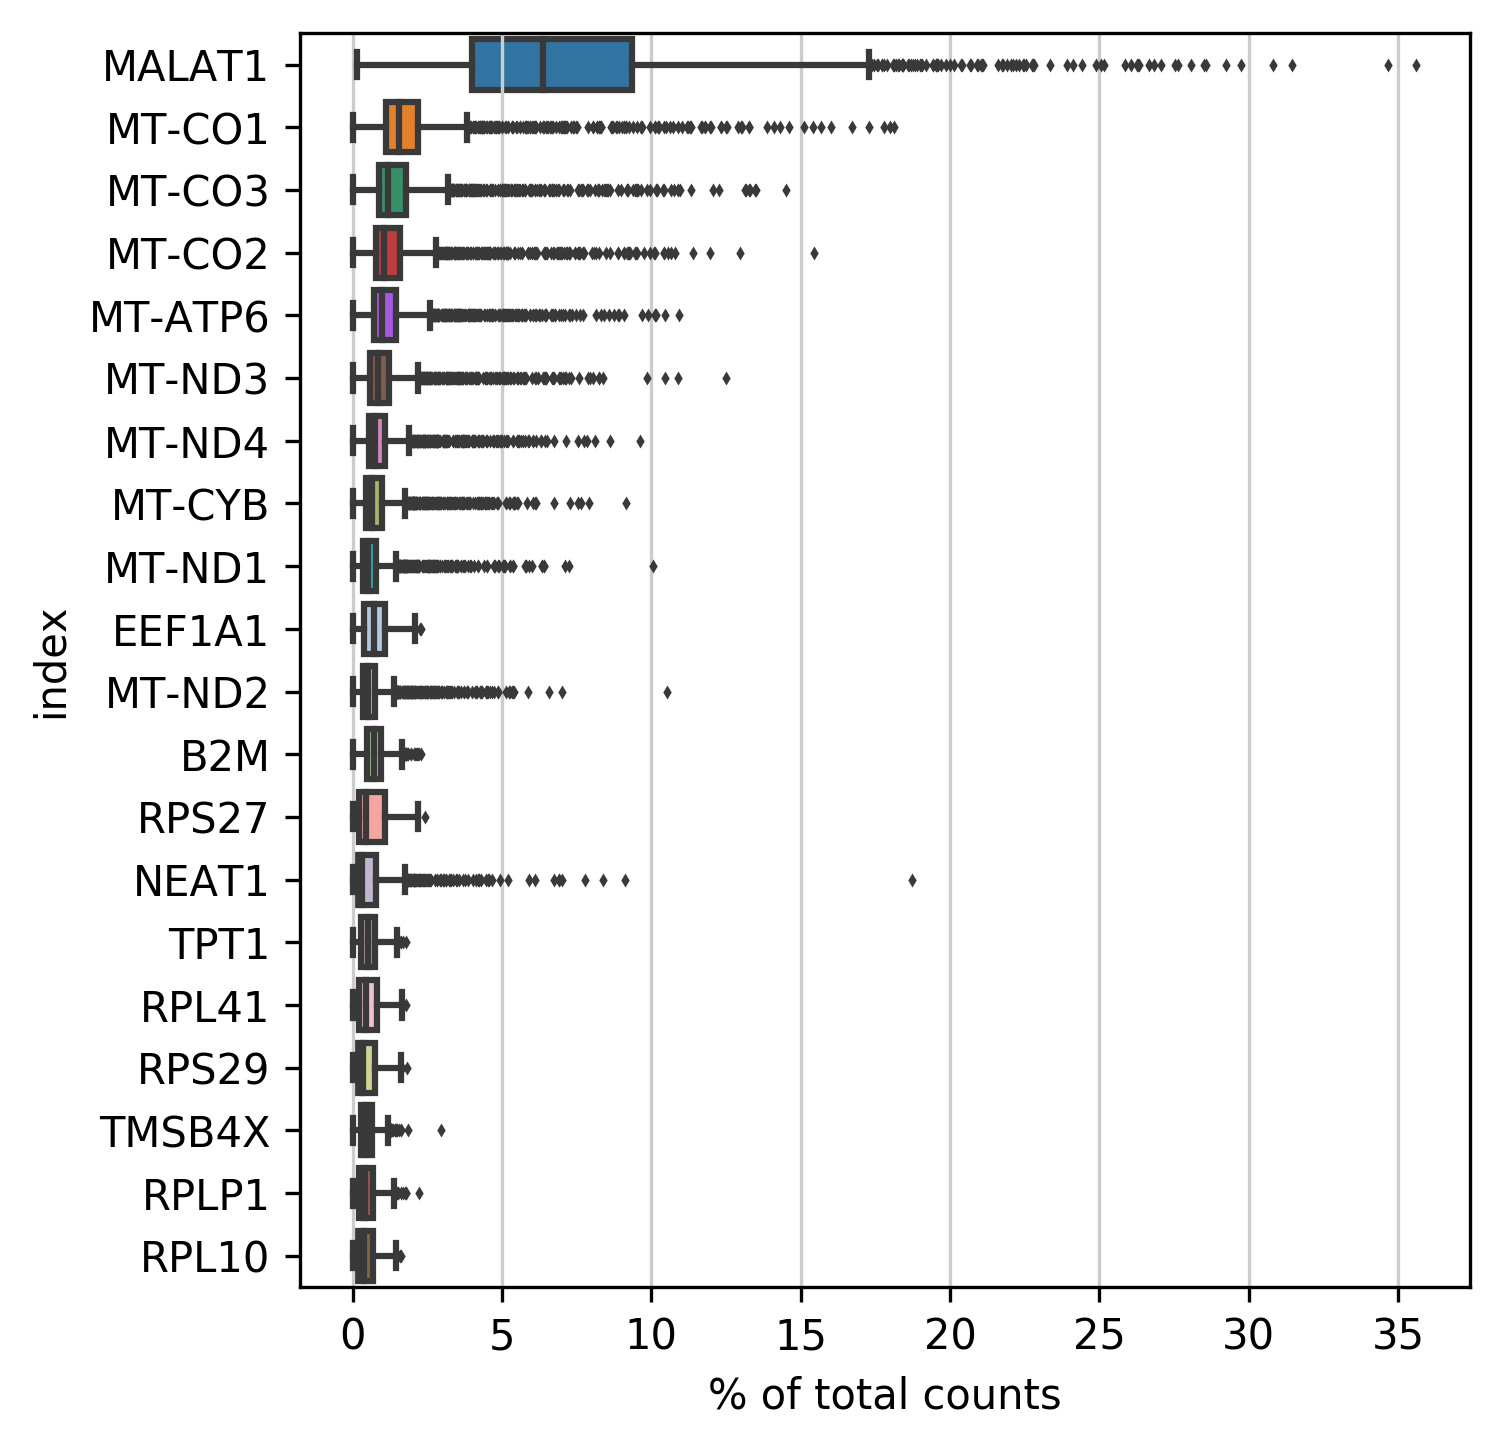

In [12]:
sc.pl.highest_expr_genes(adata_pre, n_top=20)

#### Summary histograms showing the distributions of number of genes, number of counts, and fraction of mitochondrial genes

Please note that the histogram for the number of cells expressing each gene has a log-scale for both the x- and y-axis.

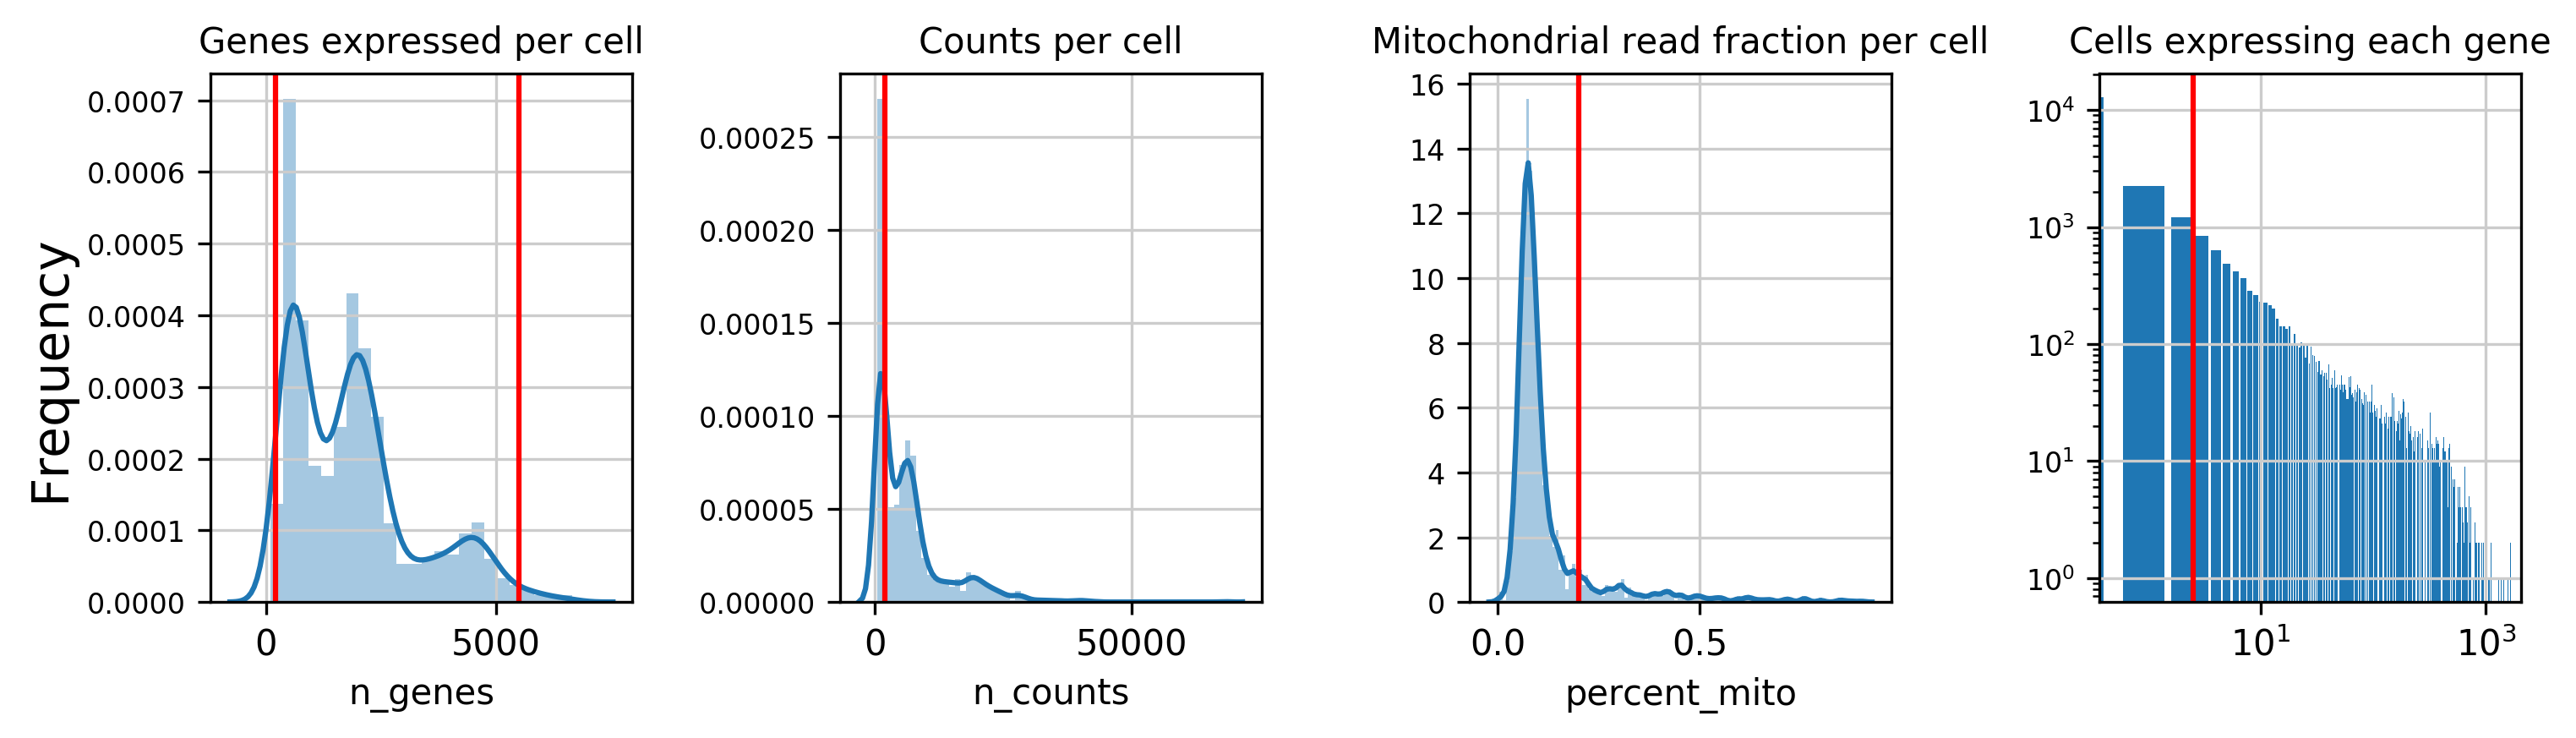

In [13]:
plotSummaryHist(adata_pre, nCellsPerGene_pre, 
                draw_thresholds=True,
                log_x=[False]*3+[True],
                log_y=[False]*3+[True])

#### Summary violin plots showing the distributions of number of genes, number of counts, and fraction of mitochondrial genes

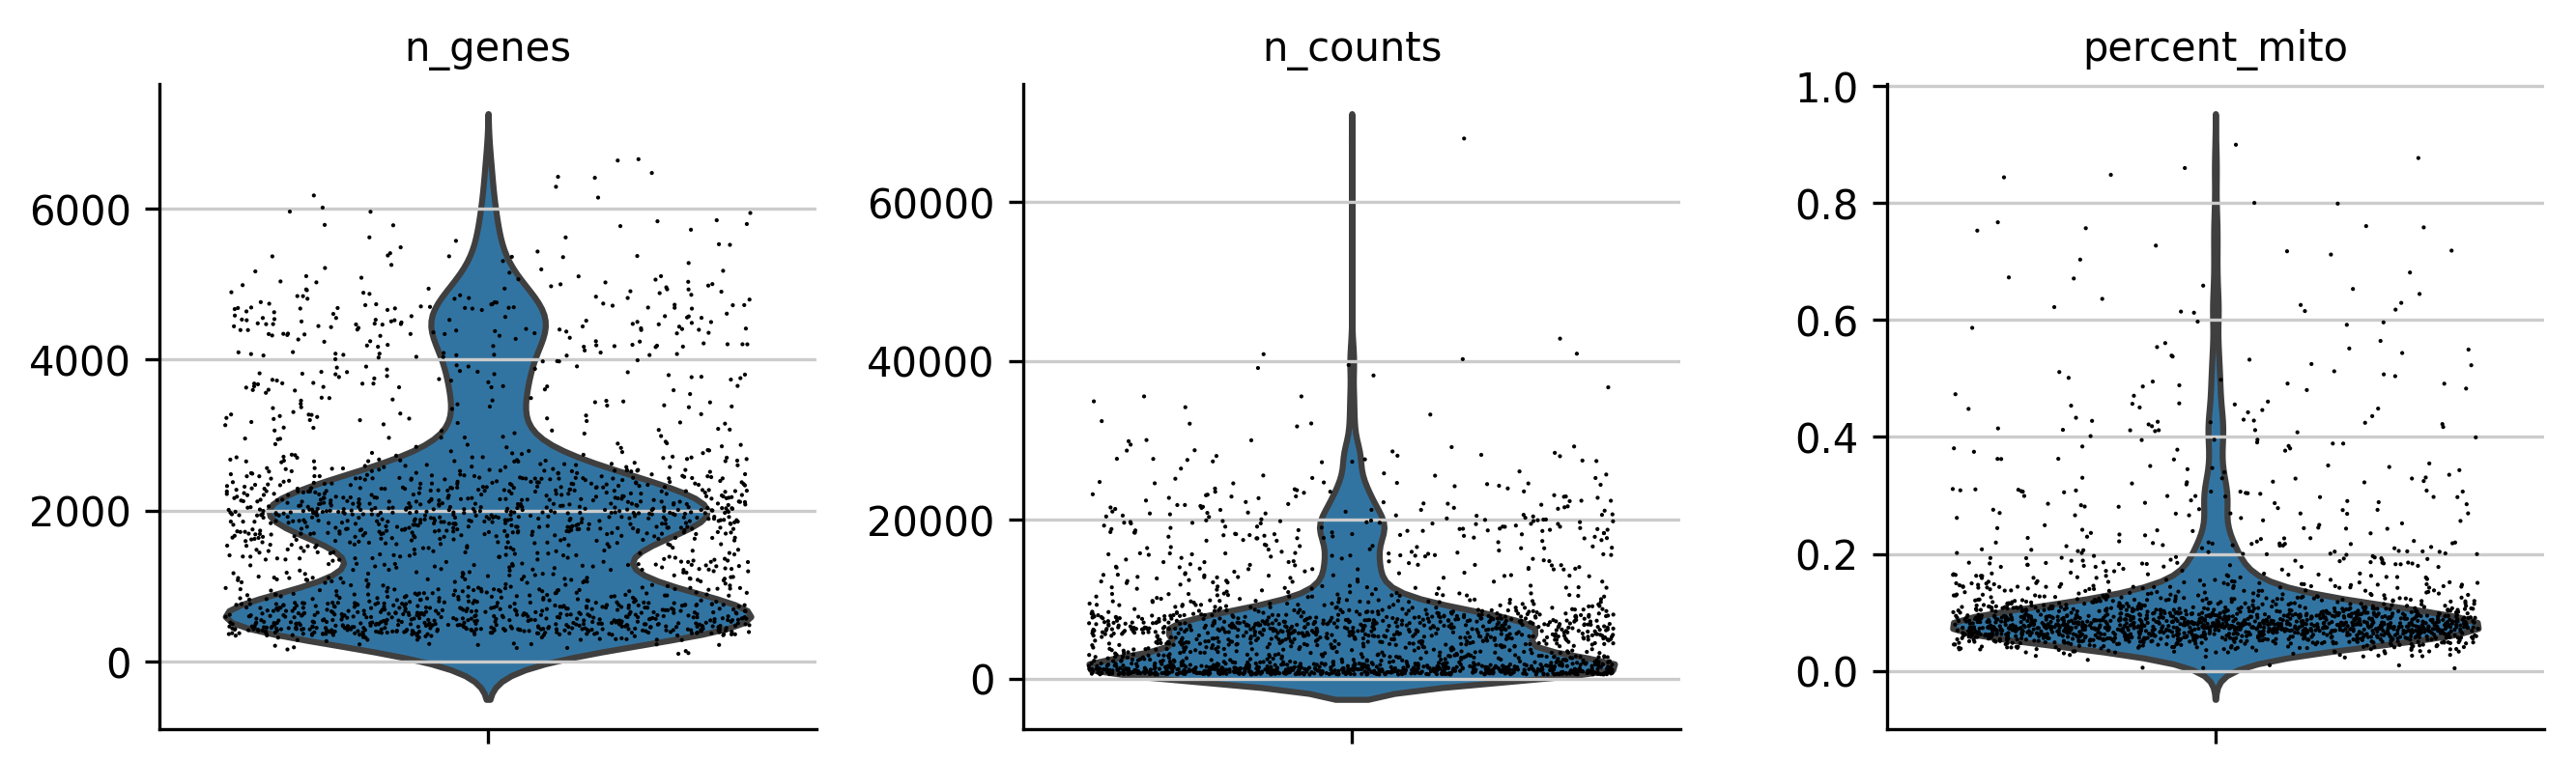

In [14]:
metrics = ['n_genes', 'n_counts', 'percent_mito']
sc.pl.violin(adata_pre, np.array(metrics)[np.isin(metrics,adata_pre.obs.keys())],
    jitter=0.4, multi_panel=True )

#### Scatter plot showing the number of genes vs number of counts, colored by mitochondrial read fraction

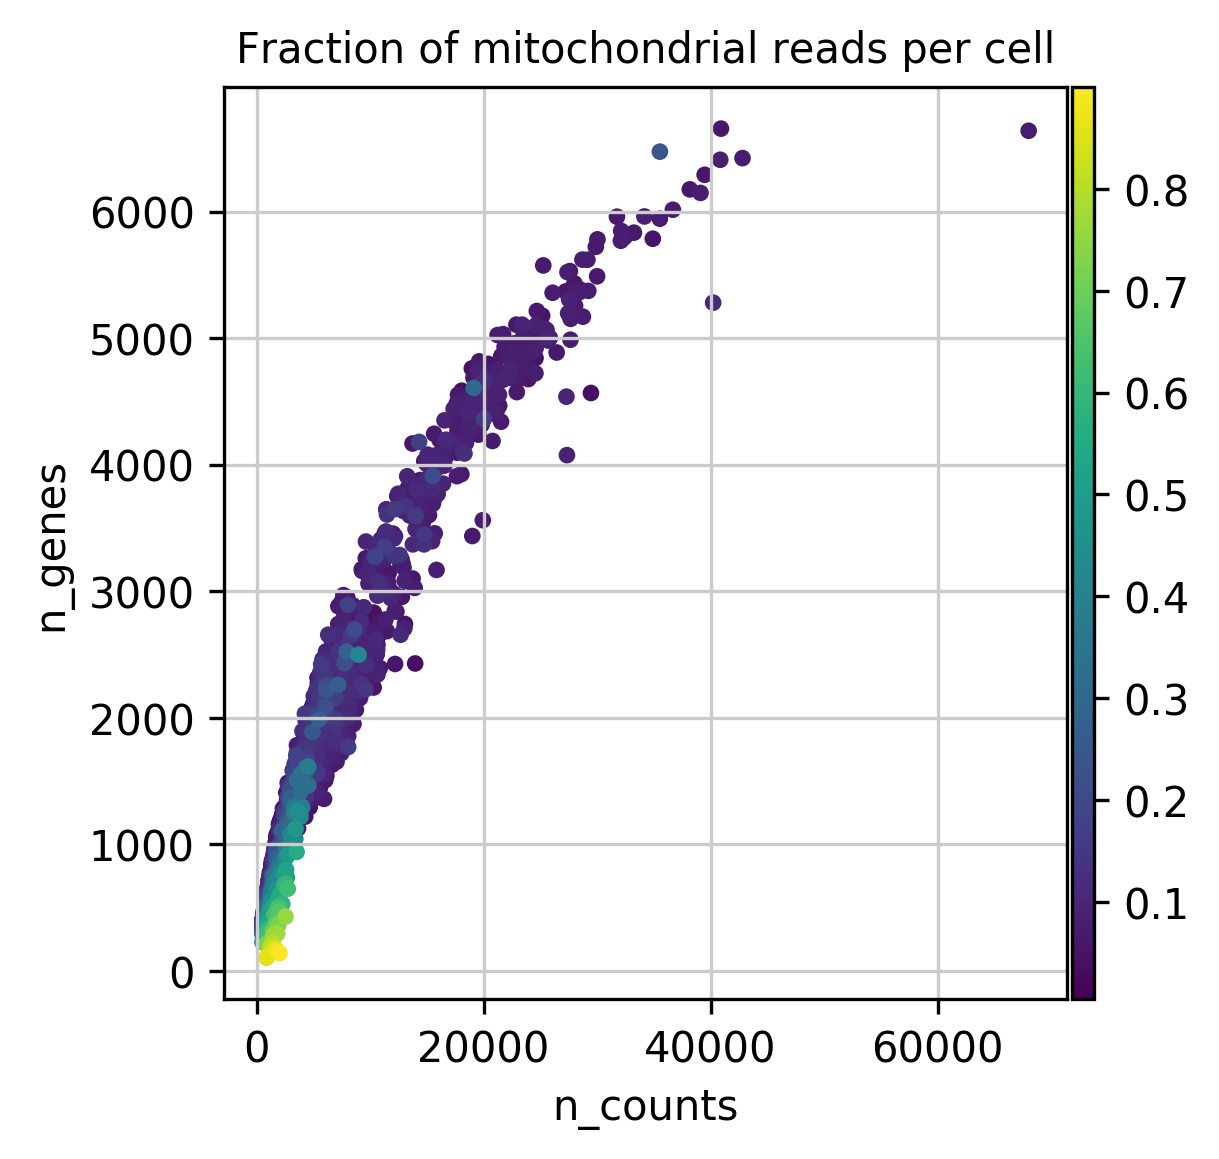

In [15]:
if 'percent_mito' in adata_pre.obs.keys():
    sc.pl.scatter(adata_pre, x='n_counts', y='n_genes', color='percent_mito', title="Fraction of mitochondrial reads per cell")
else:
    sc.pl.scatter(adata_pre, x='n_counts', y='n_genes')
    warnings.warn("Percentage of mitochondrial genes expressed in cells not calculated")

---
## Setting the filters

In [16]:
print(adata_pre.uns['sc']['scanpy']['filter'])

{'cellFilterMaxNCounts': -1, 'cellFilterMaxNGenes': 5500, 'cellFilterMaxPercentMito': 0.2, 'cellFilterMinNCounts': 2000, 'cellFilterMinNGenes': 200, 'cellFilterStrategy': 'fixedthresholds', 'geneFilterMinNCells': 3}


### Filter 1: Number of genes expressed per cell

**Cell-level filtering**

To determine whether the thresholds are set correctly, it's useful to look at a histogram showing the distribution of the number of genes expressed for each cell. Here, the entire range of the data (equivalent to the summary plot above) is shown on a wide x-axis. The current thresholds are show in red lines (it's possible that one or both thresholds are outside the plot limits; in this case the threshold should likely be raised/lowered to better fit the data).

Number of genes expressed per cell threshold is set to 200-5500
Unfiltered data range is 104-6655.


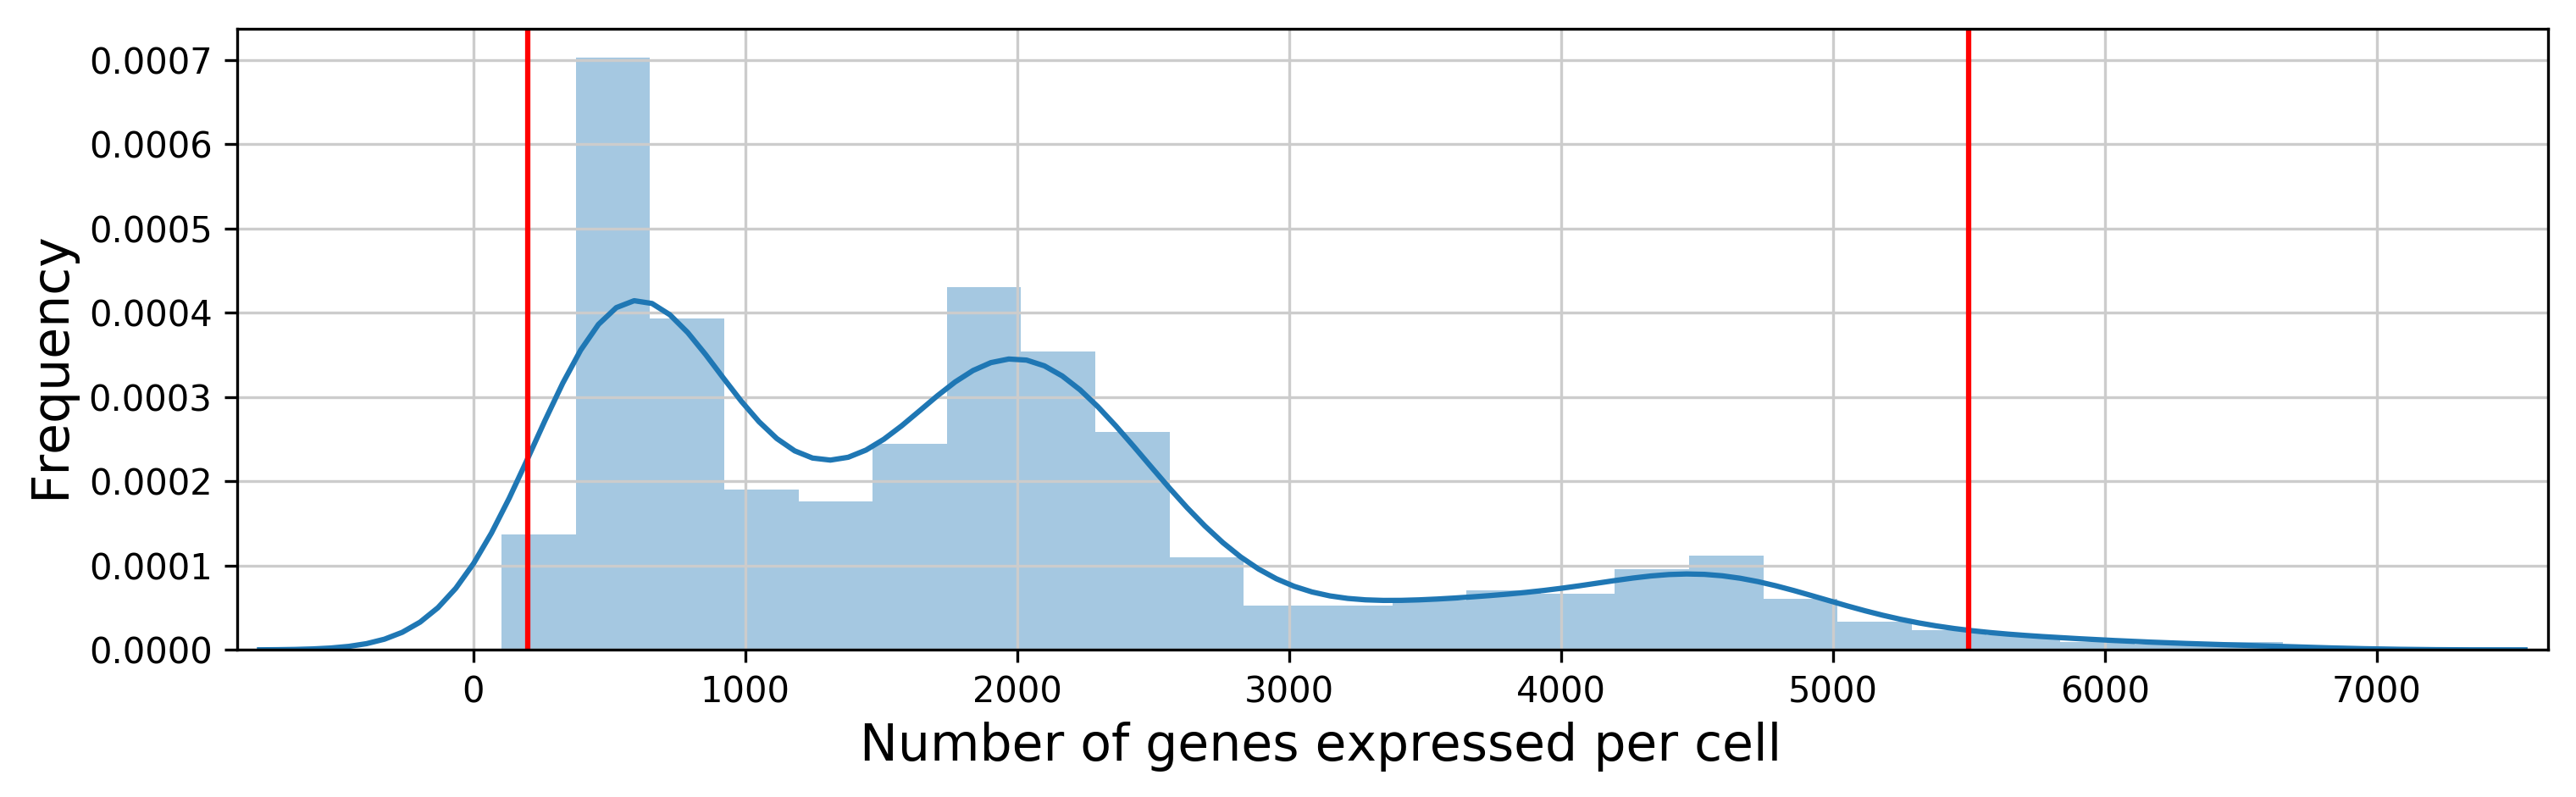

In [17]:
thr = [ adata_pre.uns['sc']['scanpy']['filter']['cellFilterMinNGenes'],
        adata_pre.uns['sc']['scanpy']['filter']['cellFilterMaxNGenes'] ]
plotSingleDiagnosticHist(adata_pre.obs['n_genes'],
                         xlab='Number of genes expressed per cell',
                         filter_thr=thr)
print("Number of genes expressed per cell threshold is set to {}-{}".format(thr[0],thr[1]))
print("Unfiltered data range is {}-{}.".format(adata_pre.obs['n_genes'].min(),adata_pre.obs['n_genes'].max() ))

### Filter 2: Number of counts expressed per cell

**Cell-level filtering**

To determine whether the thresholds are set correctly, it's useful to look at a histogram showing the distribution of the number of genes expressed for each cell. Here, the entire range of the data (equivalent to the summary plot above) is shown on a wide x-axis. The current thresholds are show in red lines (it's possible that one or both thresholds are outside the plot limits; in this case the threshold should likely be raised/lowered to better fit the data).

Number of counts expressed per cell threshold is set to 2000--1
Unfiltered data range is 502.0-68013.0.


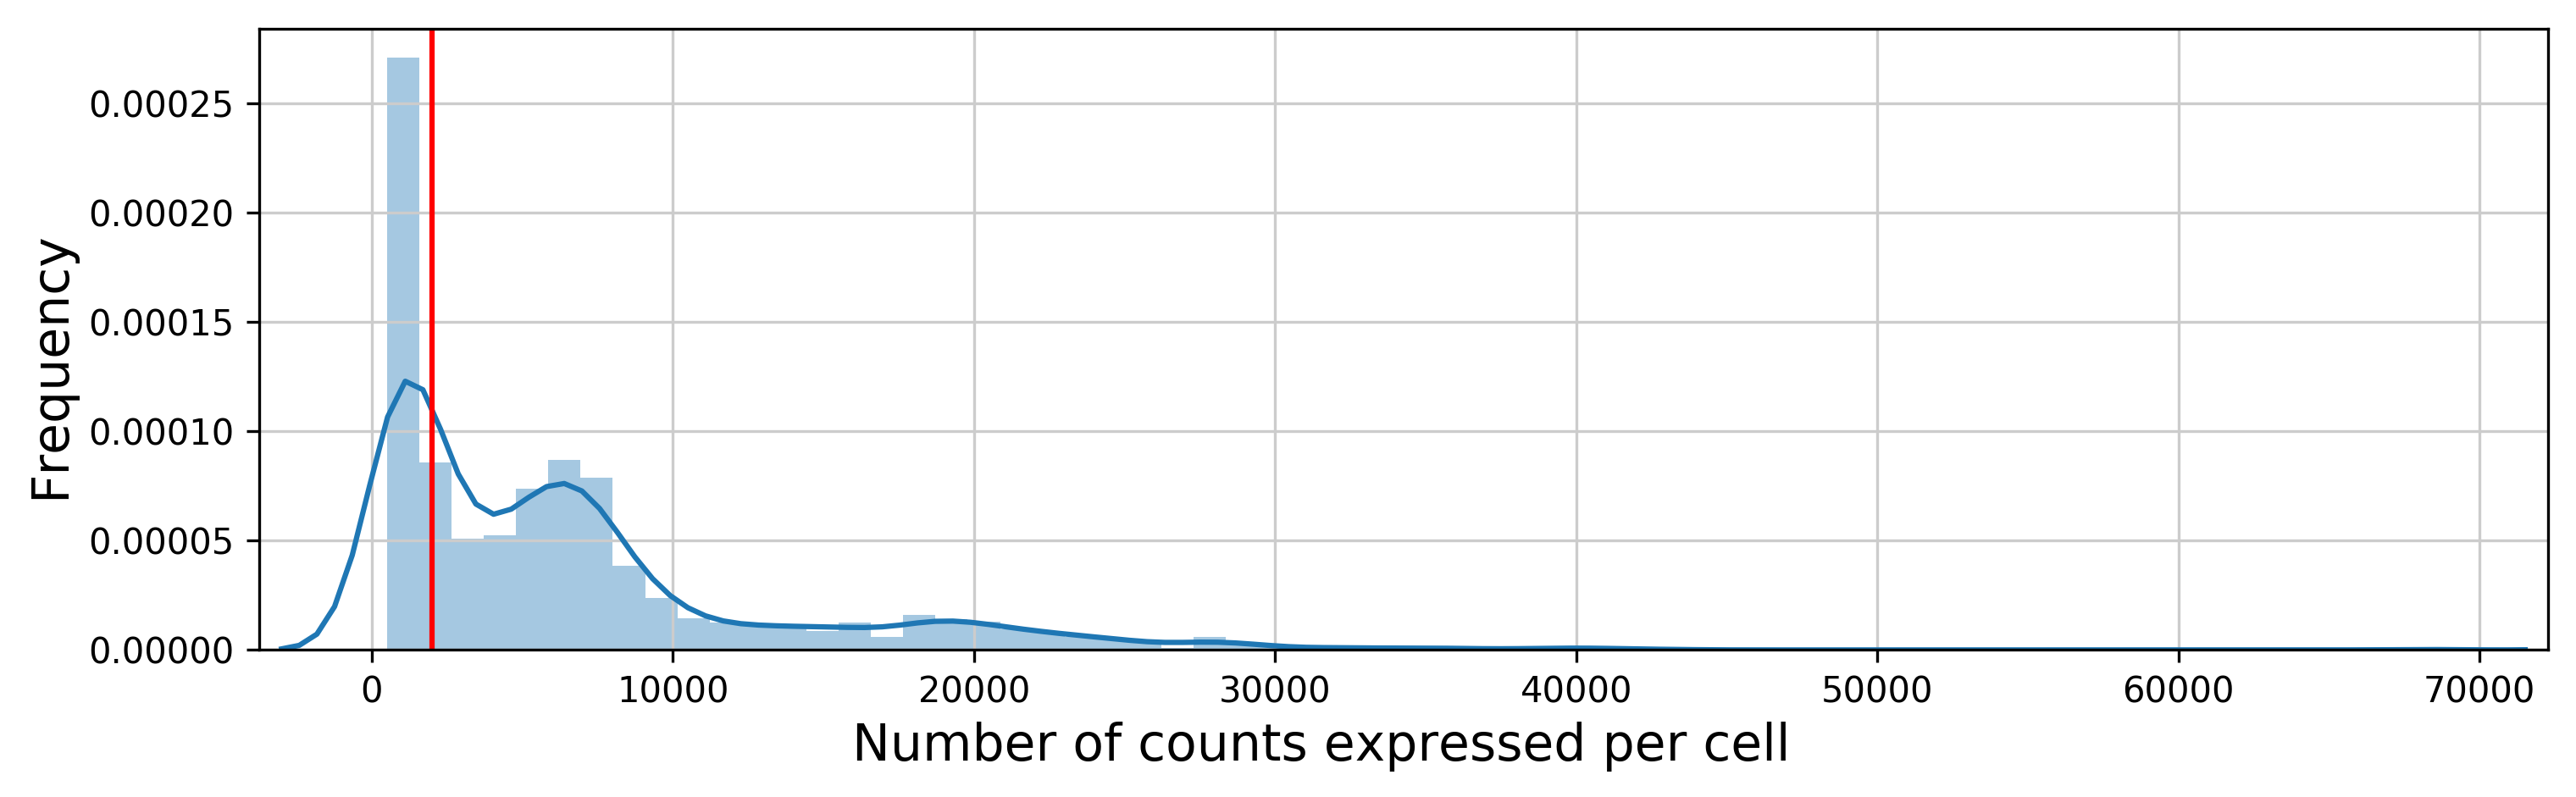

In [18]:
thr = [ adata_pre.uns['sc']['scanpy']['filter']['cellFilterMinNCounts'],
        adata_pre.uns['sc']['scanpy']['filter']['cellFilterMaxNCounts'] ]
plotSingleDiagnosticHist(adata_pre.obs['n_counts'],
                         xlab='Number of counts expressed per cell',
                         filter_thr=thr)
print("Number of counts expressed per cell threshold is set to {}-{}".format(thr[0],thr[1]))
print("Unfiltered data range is {}-{}.".format(adata_pre.obs['n_counts'].min(),adata_pre.obs['n_counts'].max() ))

### Filter 3: Fraction of mitochondrial reads per cell

**Cell-level filtering**

The same approach is used to examine the fraction of mitochondrial reads per cell. In this case, there is only an upper threshold on mitochondrial read fraction (cells with a mitochondrial read fraction above this threshold will be discarded).

Fraction of mitochondrial reads per cell threshold limit is set to 0.2
Unfiltered data range is 0.004285714123398066-0.8999504446983337.


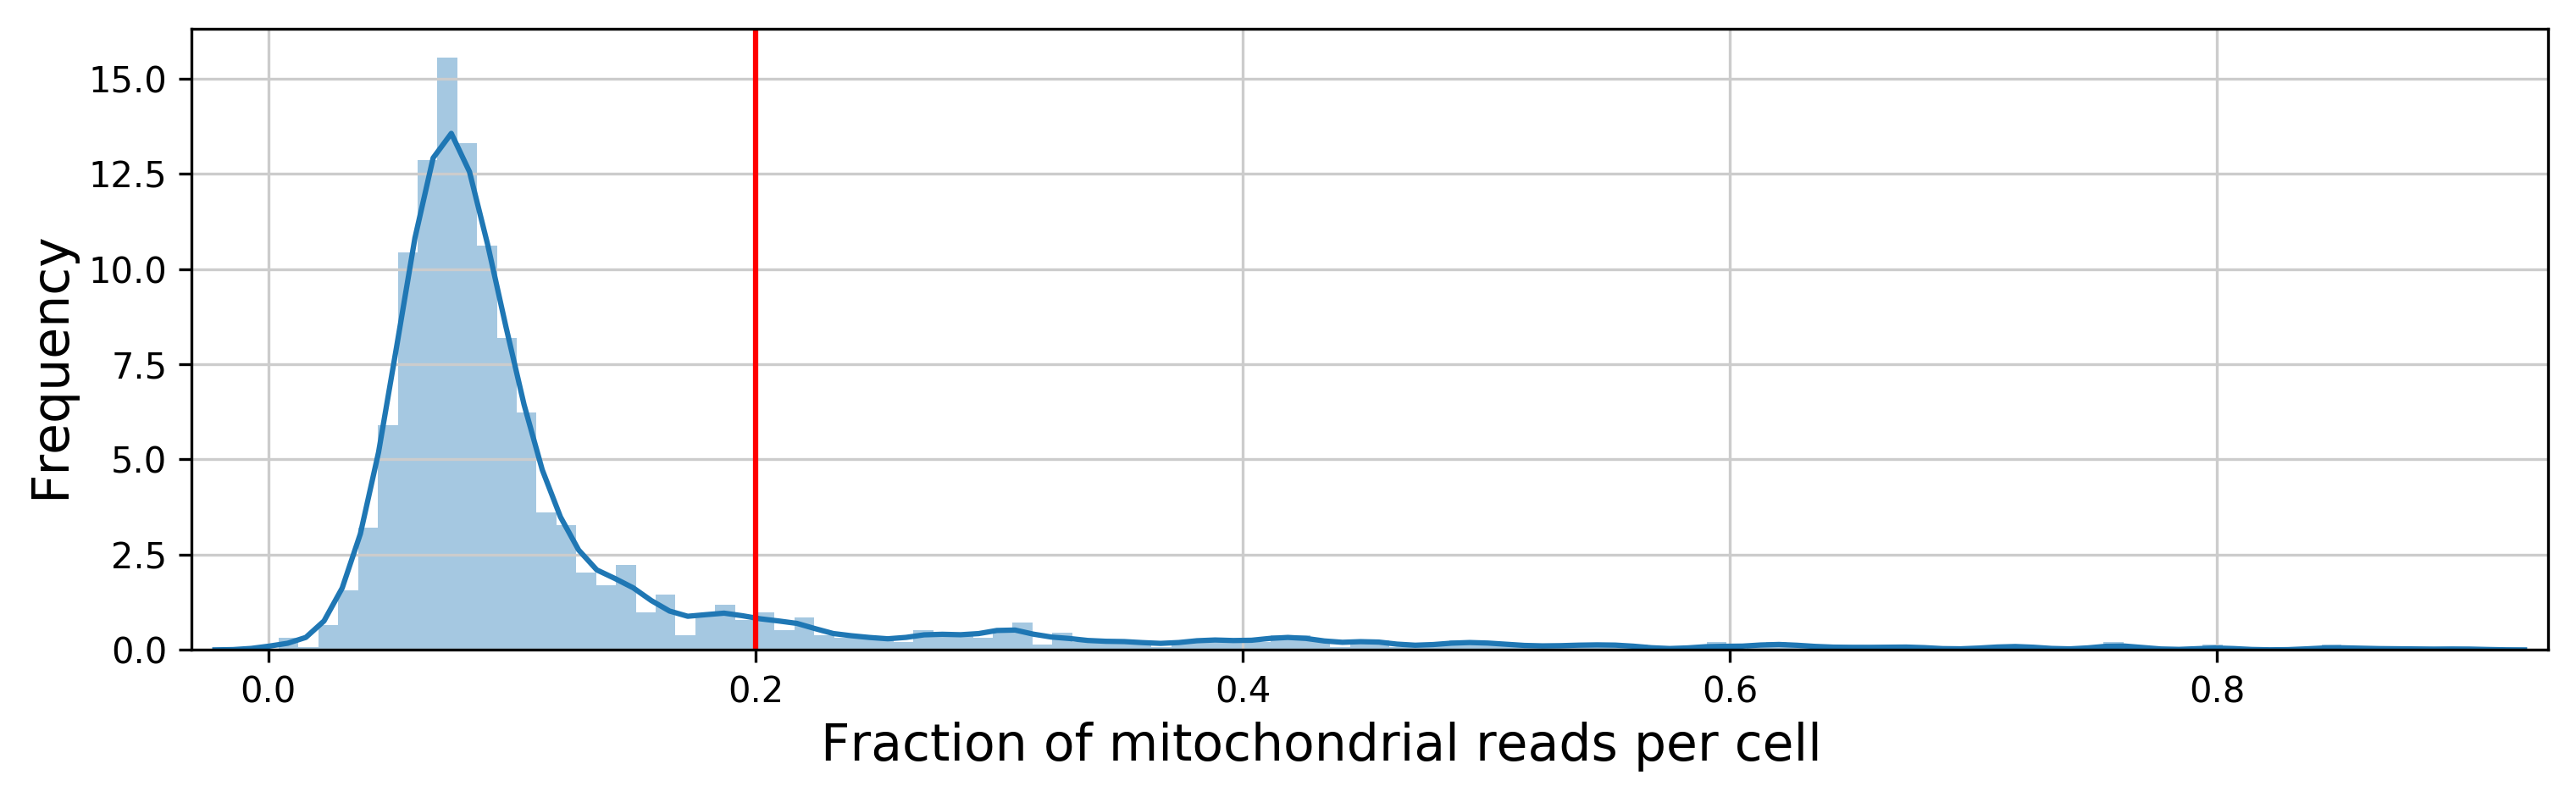

In [19]:
if 'percent_mito' in adata_pre.obs.keys():
    thr = adata_pre.uns['sc']['scanpy']['filter']['cellFilterMaxPercentMito']
    plotSingleDiagnosticHist(adata_pre.obs['percent_mito'],
                         xlab='Fraction of mitochondrial reads per cell',
                         filter_thr=thr)
    print("Fraction of mitochondrial reads per cell threshold limit is set to {}".format(thr))
    print("Unfiltered data range is {}-{}.".format(adata_pre.obs['percent_mito'].min(),adata_pre.obs['percent_mito'].max() ))
else:
    warnings.warn("Percentage of mitochondrial genes expressed in cells not calculated")

### Filter 4: Number of cells expressing each gene

**Gene-level filtering**

The final filter is applied on a gene-level: For each gene, we count the number of cells in which it is expressed. The distribution here is usually highly skewed, such that there are a large number of genes expressed in only a few cells (with many expressed in 0 or 1 cells). The threshold here can be conservatively set low: requiring a minimum of **3** cells expressing any given gene is a reasonable start, but this will be highly dependent on the data, particularly the total number of cells in the experiment.

The same approach is used as above, with the x and y axes displayed in log scale (this causes the bars at the lower end to be very wide, but this is the region of interest anyway). In this case, there is only an upper threshold on number of cells expressing each gene.

Keeping genes present in at least 3 cells
Unfiltered data range is 0-1873.


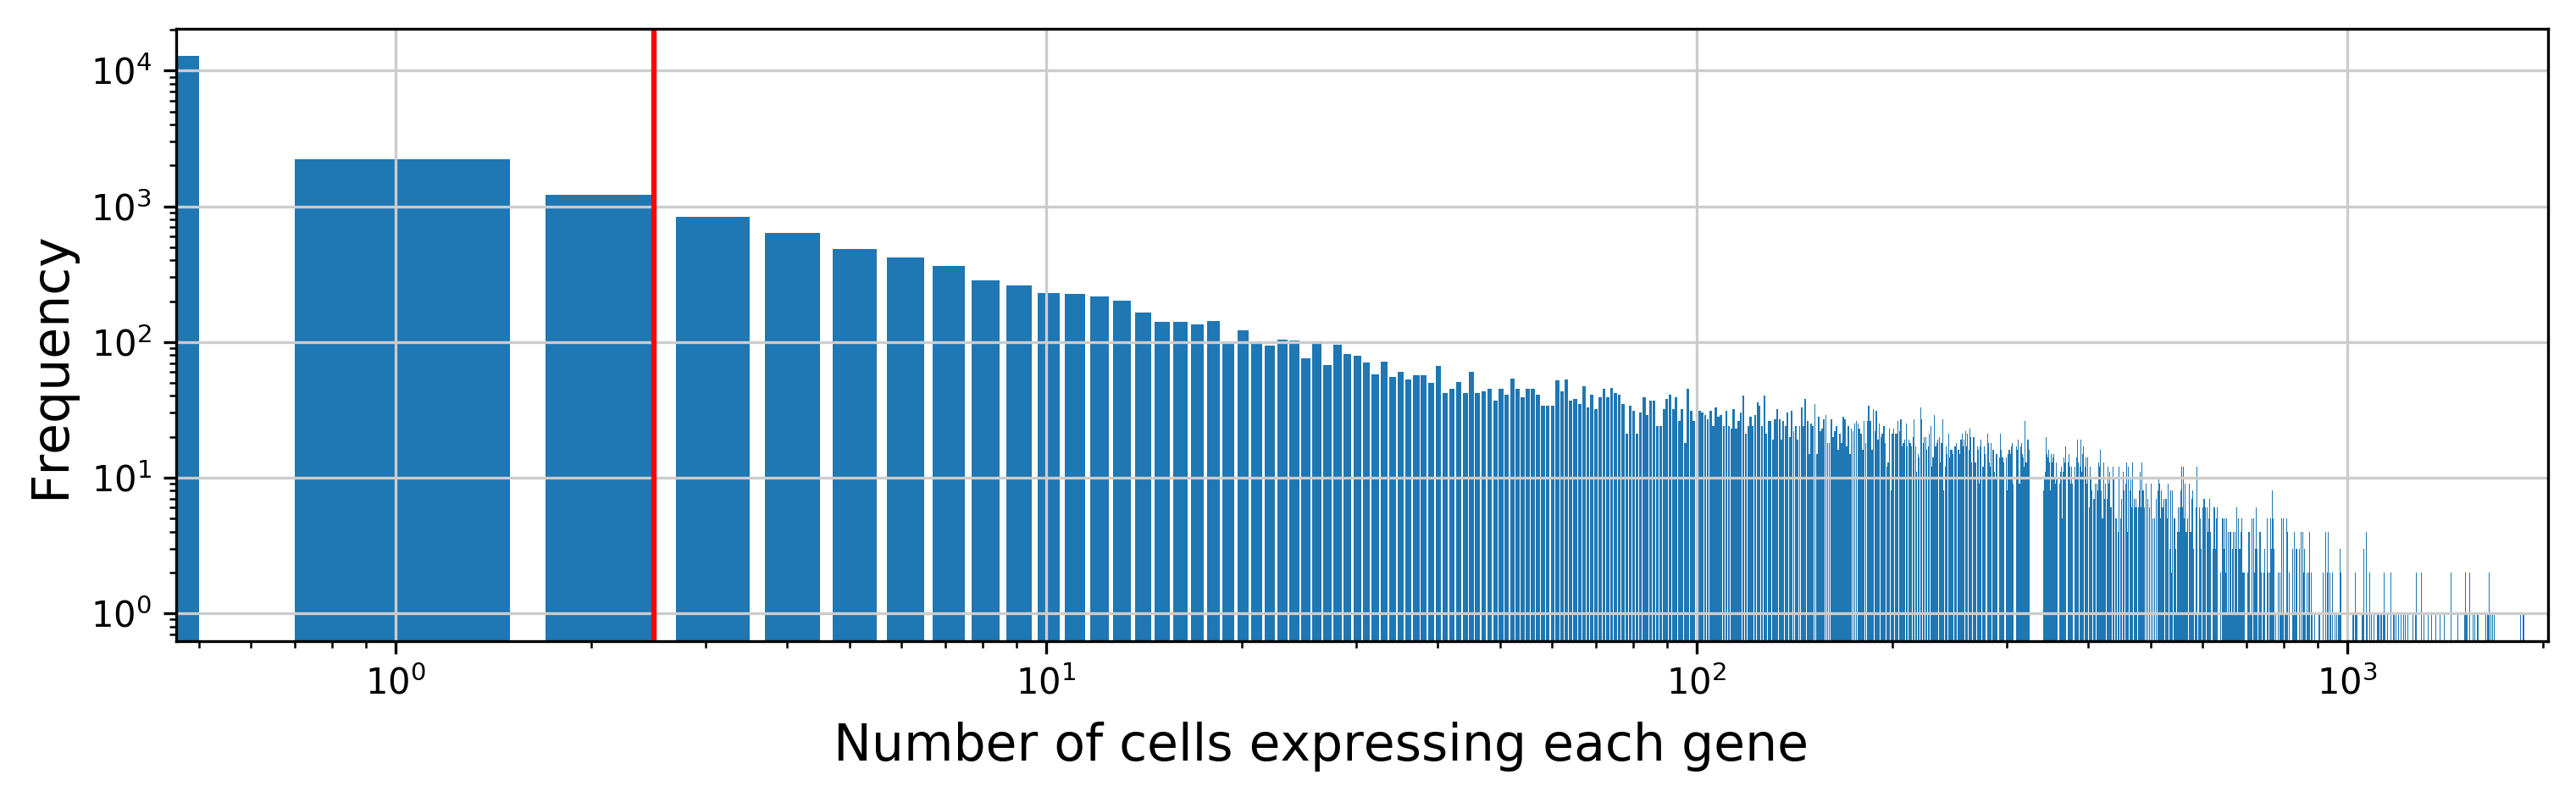

In [20]:
thr = adata_pre.uns['sc']['scanpy']['filter']['geneFilterMinNCells']
plotSingleDiagnosticBar(nCellsPerGene_pre,
                         xlab='Number of cells expressing each gene',
                         filter_thr=thr-0.5, log_x=True, log_y=True)

print("Keeping genes present in at least {} cells".format(thr))
print("Unfiltered data range is {}-{}.".format(nCellsPerGene_pre.min(),nCellsPerGene_pre.max() ))

---
## Diagnostic Plots (post-filtering)

Here, we show repeat the summary plots shown above, this time showing the data **after filting**.

In [21]:
# re-calculate number of cells per gene for post-filter:
nCellsPerGene_post = pd.Series( np.sum(adata_post.X>0, axis=0).tolist()[0], index=adata_post.var_names )

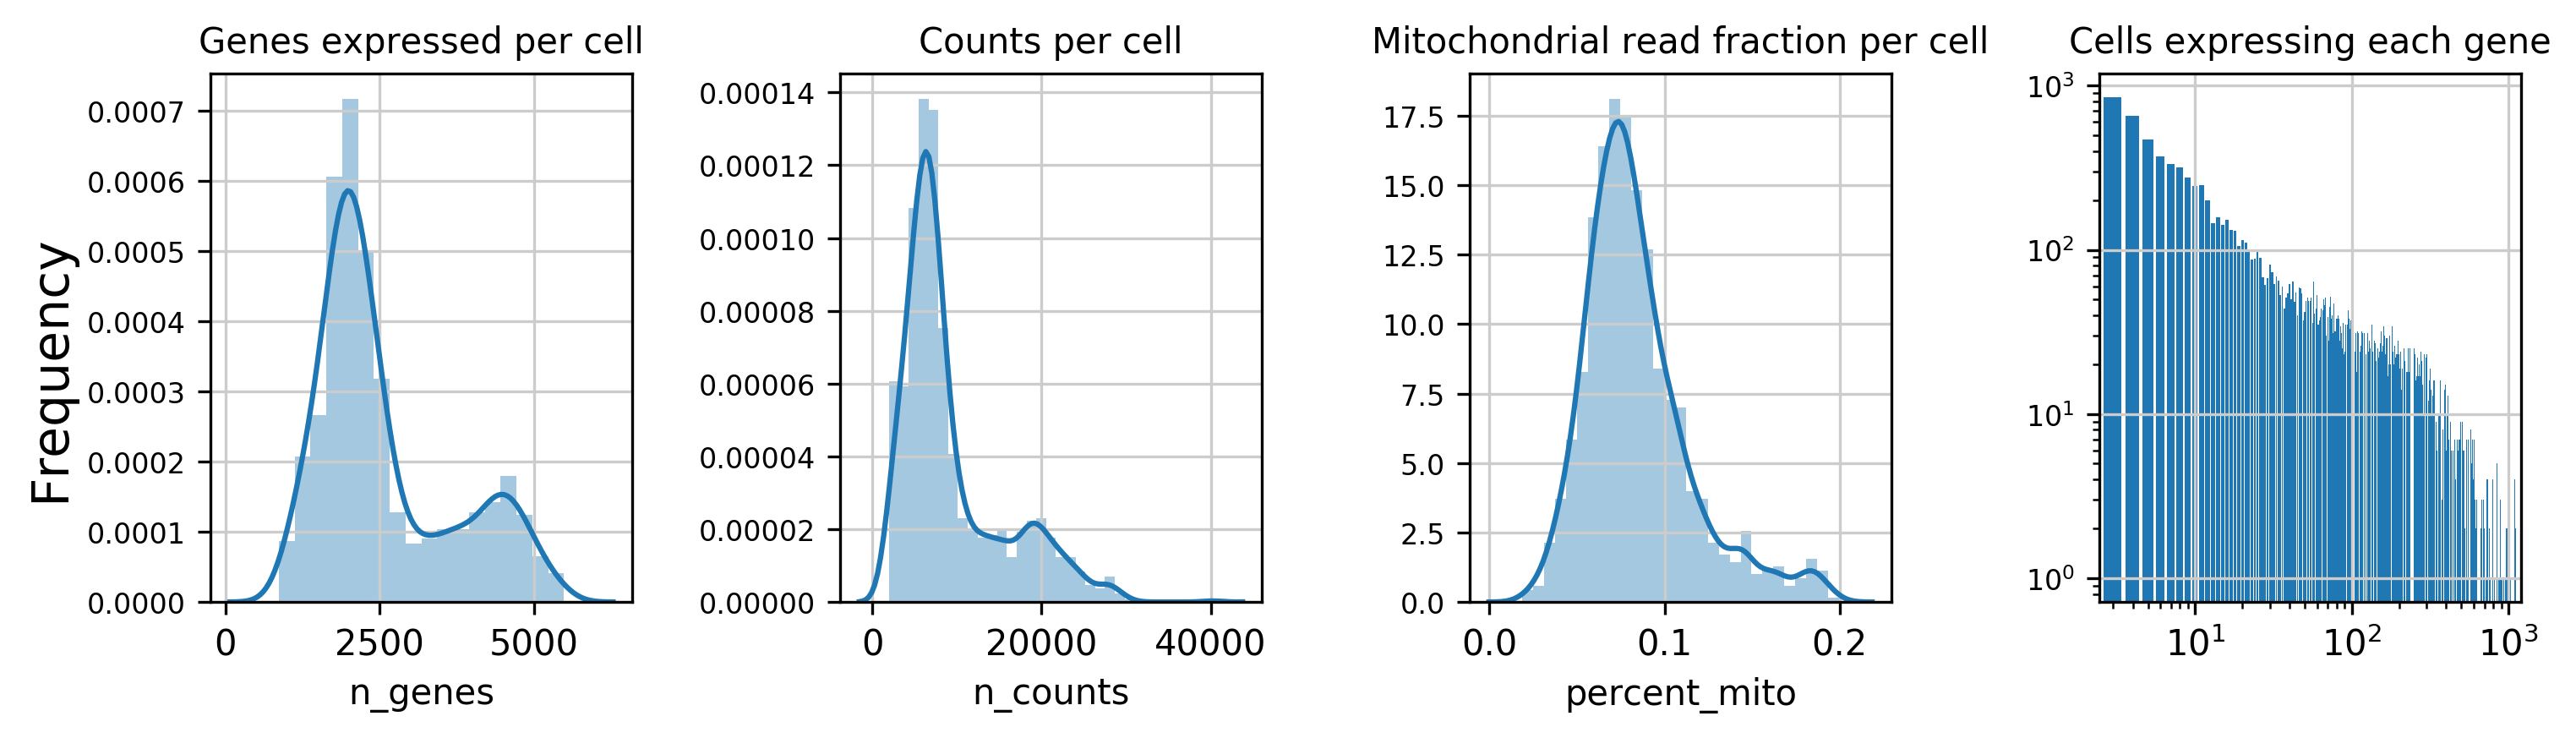

In [22]:
plotSummaryHist(adata_post, nCellsPerGene_post,
                draw_thresholds=False,
                log_x=[False]*3+[True],
                log_y=[False]*3+[True])

#### Violin plots of number of genes, number of counts, and percent of mitochondrial genes

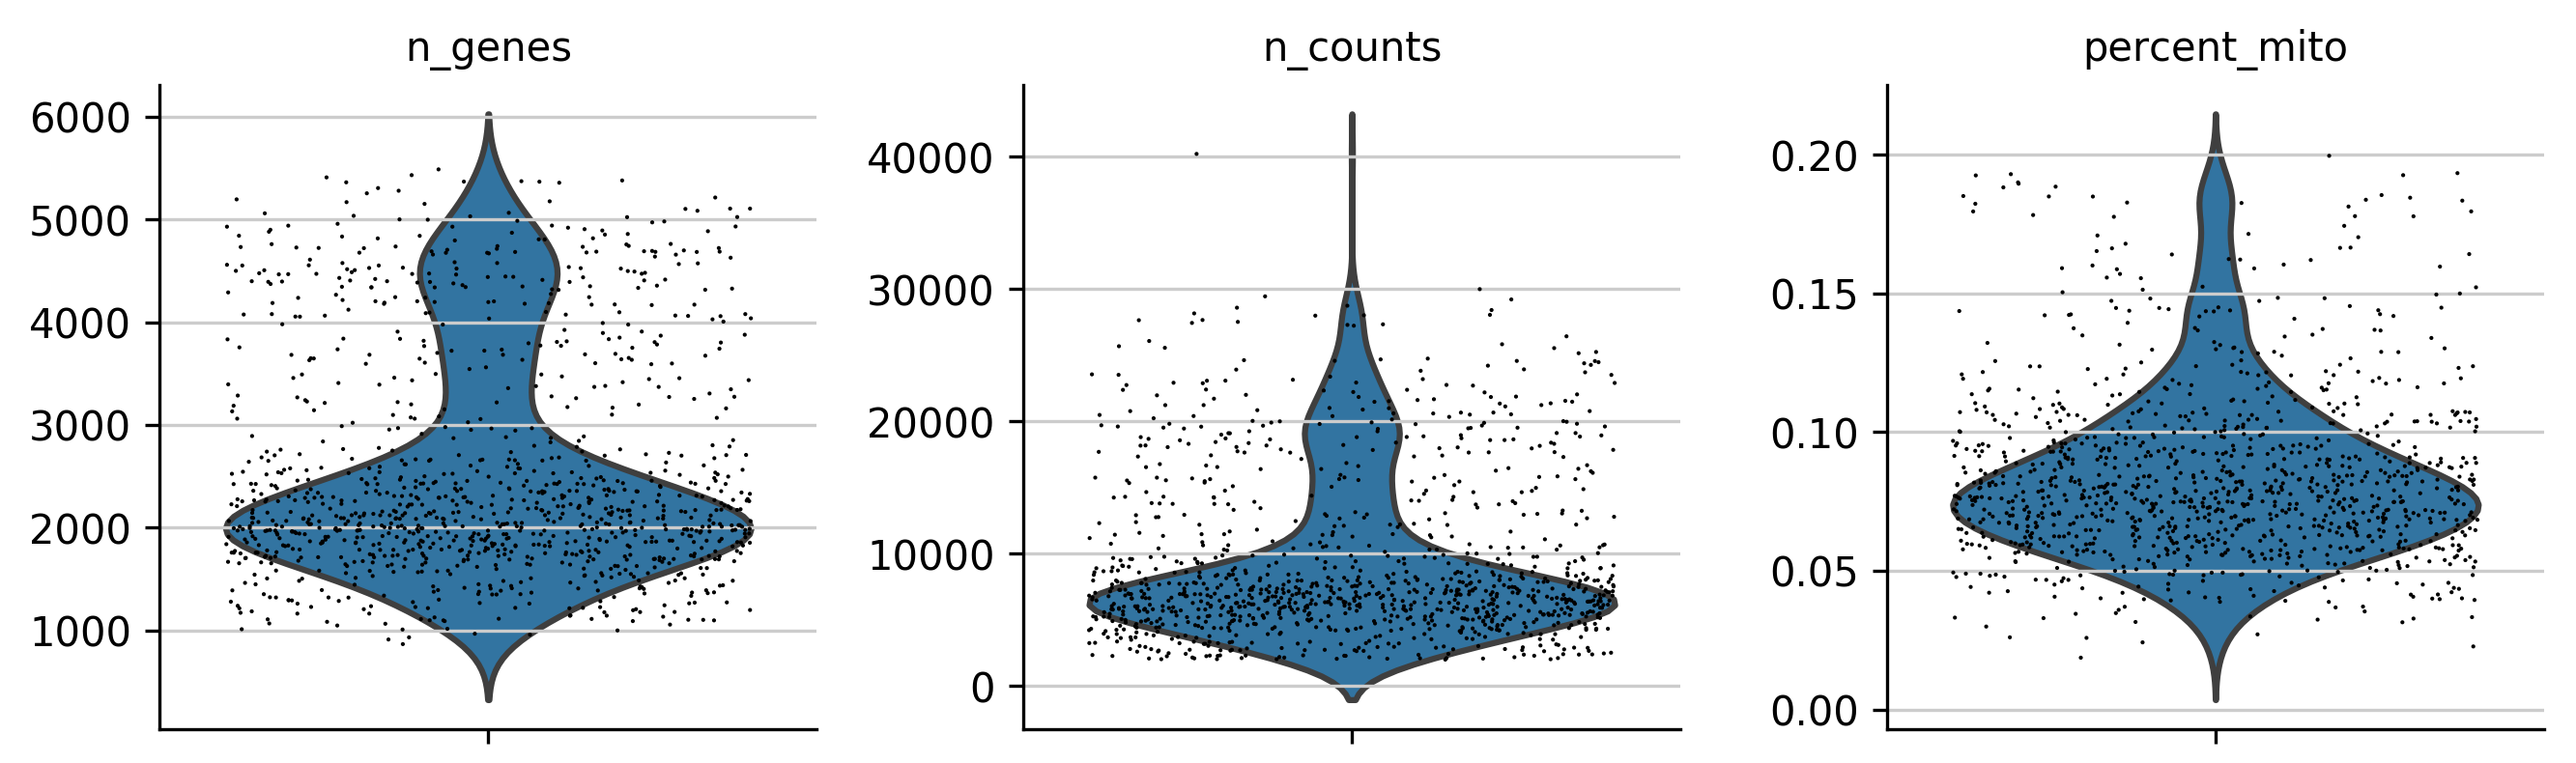

In [23]:
metrics = ['n_genes', 'n_counts', 'percent_mito']
sc.pl.violin(adata_post, np.array(['n_genes', 'n_counts', 'percent_mito'])[np.isin(metrics,adata_post.obs.keys())],
    jitter=0.4, multi_panel=True )

#### Scatter plot number of genes vs number of counts

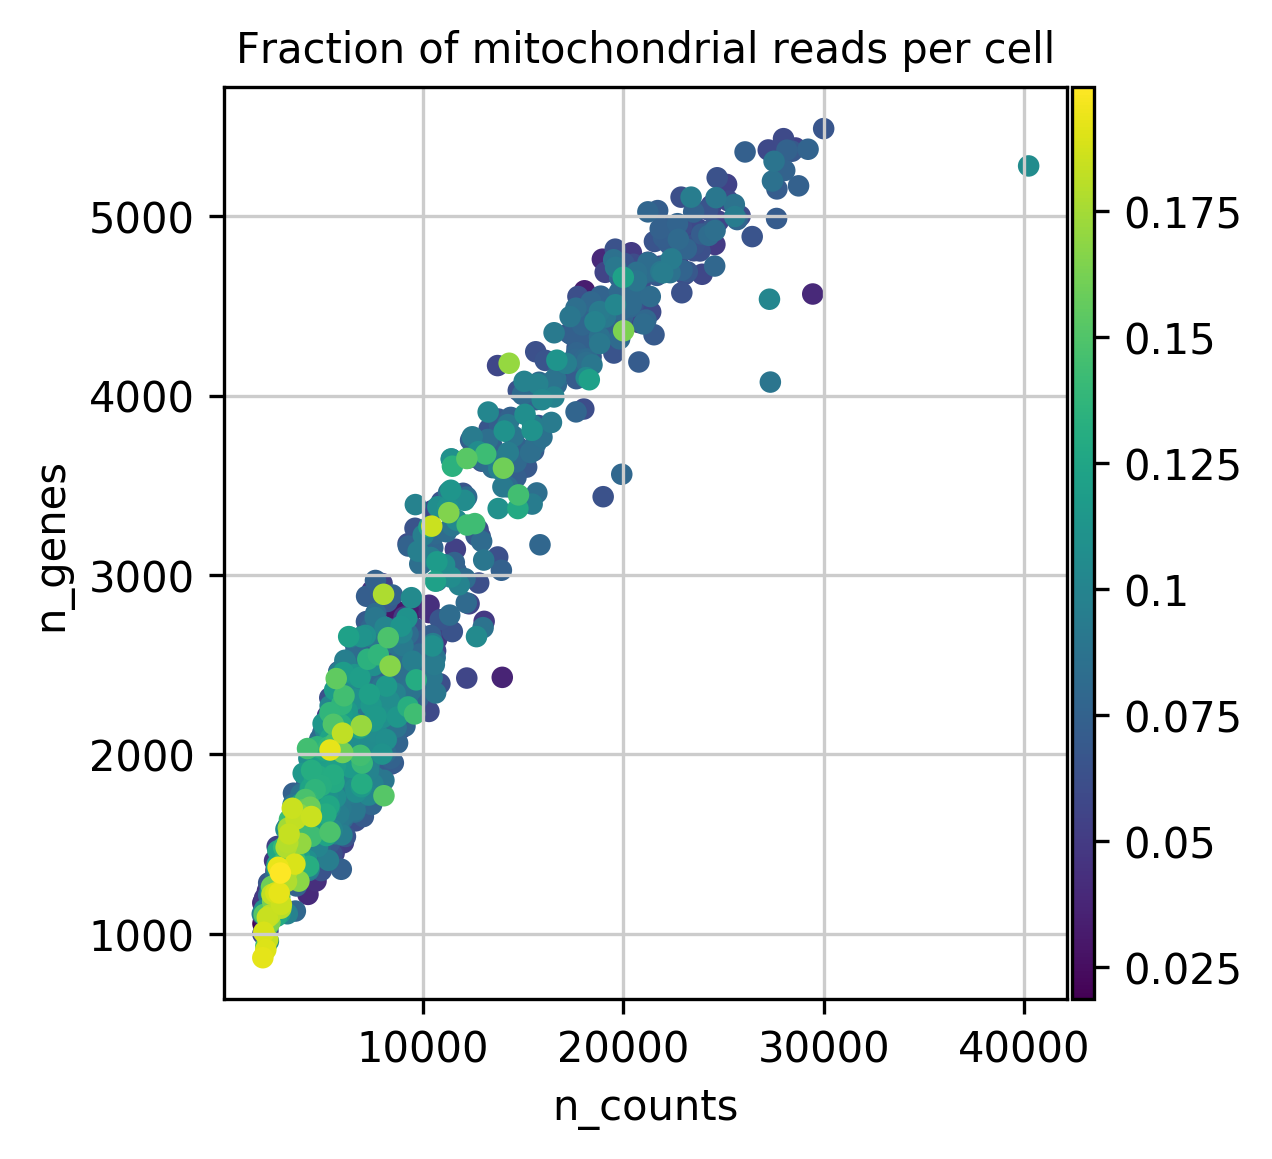

In [24]:
if 'percent_mito' in adata_post.obs.keys():
    sc.pl.scatter(adata_post, x='n_counts', y='n_genes', color='percent_mito', title="Fraction of mitochondrial reads per cell")
else:
    sc.pl.scatter(adata_post, x='n_counts', y='n_genes')
    warnings.warn("Percentage of mitochondrial genes expressed in cells not calculated")

---
## Summary

In [25]:
print(f"Pre-filtered data: {FILE1}\n\t{adata_pre._n_obs} cells\n\t{adata_pre._n_vars} genes")
#
print(f"Filters applied:\n\tNumber of genes expressed per cell:")
thr = [ adata_pre.uns['sc']['scanpy']['filter']['cellFilterMinNGenes'], adata_pre.uns['sc']['scanpy']['filter']['cellFilterMaxNGenes'] ]
print("\t\tUnfiltered data range is {}-{}.".format(adata_pre.obs['n_genes'].min(),adata_pre.obs['n_genes'].max() ))
print("\t\tthreshold is set to {}-{}".format(thr[0],thr[1]))
print("\t\tFiltered data range is {}-{}.".format(adata_post.obs['n_genes'].min(),adata_post.obs['n_genes'].max() ))
#
if 'percent_mito' in adata_pre.obs.keys():
    print(f"\tFraction of mitochondrial reads per cell:")
    thr = adata_pre.uns['sc']['scanpy']['filter']['cellFilterMaxPercentMito']
    print(f"\t\tUnfiltered data range is {adata_pre.obs['percent_mito'].min()}-{adata_pre.obs['percent_mito'].max()}.")
    print(f"\t\tthreshold limit is set to {thr}")
    print(f"\t\tFiltered data range is {adata_post.obs['percent_mito'].min()}-{adata_post.obs['percent_mito'].max()}.")
#
print(f"\tNumber of cells expressing each gene:")
thr = adata_pre.uns['sc']['scanpy']['filter']['geneFilterMinNCells']
print(f"\t\tUnfiltered data range is {nCellsPerGene_pre.min()}-{nCellsPerGene_pre.max()}.")
print(f"\t\tthreshold is set to keep genes present in at least {thr} cells")
print(f"\t\tFiltered data range is {nCellsPerGene_post.min()}-{nCellsPerGene_post.max()}.")
#
print(f"Post-filtered data: {FILE2}")
print(f"\t{adata_post._n_obs} cells (removed {adata_pre._n_obs - adata_post._n_obs})")
print(f"\t{adata_post._n_vars} genes (removed {adata_pre._n_vars - adata_post._n_vars})")

Pre-filtered data: PBMCmix_1.SC__SCANPY__COMPUTE_QC_STATS.h5ad
	1873 cells
	33538 genes
Filters applied:
	Number of genes expressed per cell:
		Unfiltered data range is 104-6655.
		threshold is set to 200-5500
		Filtered data range is 866-5488.
	Fraction of mitochondrial reads per cell:
		Unfiltered data range is 0.004285714123398066-0.8999504446983337.
		threshold limit is set to 0.2
		Filtered data range is 0.01864573173224926-0.19958706200122833.
	Number of cells expressing each gene:
		Unfiltered data range is 0-1873.
		threshold is set to keep genes present in at least 3 cells
		Filtered data range is 3-1124.
Post-filtered data: PBMCmix_1.SC__SCANPY__GENE_FILTER.h5ad
	1124 cells (removed 749)
	16859 genes (removed 16679)
